# Python Assignment 

In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
from Bio.Seq import Seq
import matplotlib as plt
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
pip install biopython

Note: you may need to restart the kernel to use updated packages.


# 1

In [4]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

Here, `def` is defining the function get_sequences_from_file with the fasta file as an argument.

This is a Python function called `get_sequences_from_file` that takes a string fasta_fn as its input parameter. The purpose of this function is to read a fasta file and store the sequence data in a dictionary format.

First, an empty dictionary called sequence_data_dict is created.

The function uses the `SeqIO.parse` function from the Biopython library to read the fasta file. This function takes two parameters, the name of the fasta file (fasta_fn in this case) and the format of the file ("fasta"). It returns an iterator that produces SeqRecord objects for each sequence in the fasta file.

The function then loops through each SeqRecord object produced by SeqIO.parse. For each record, it splits the description string into a list of words using the split function. The second and third elements of this list are concatenated to form the species_name variable.

Finally, the sequence_data_dict dictionary is updated with a new key-value pair, where the key is the species_name variable and the value is the actual DNA sequence, accessed using the seq attribute of the SeqRecord object.

Once all sequences in the fasta file have been processed, the function returns the sequence_data_dict dictionary containing all the DNA sequences from the file, with species names as keys.

# 2

In [5]:
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
print(mito_table) #to look at mito_table contents

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

The "Vertebrate Mitochondrial" codon table is one of the predefined tables available in Biopython. It is a special codon table used by mitochondrial DNA in vertebrates, which has some differences from the standard codon table used by nuclear DNA in those same organisms.

In [6]:
def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string = '' 
    if len(string_nucleotides)%3 == 0:                                                      
        for i in range(0, len(string_nucleotides), 3):
            codon = string_nucleotides[i:i + 3]
    if codon in ["TAA", "TAG", "AGA", "AGG"]:                               
            return aa_seq_string
    aa_seq_string+= mito_table[codon]                                        
    return aa_seq_string

This is a Python function called `translate_function` which takes a string of nucleotides as input and returns a string of amino acids.

The function first accesses the Vertebrate Mitochondrial codon table from the `CodonTable` module provided by Biopython. This table maps each possible codon (triplet of nucleotides) to the corresponding amino acid.

Next, the function checks if the length of the input nucleotide string is divisible by 3 (the length of a codon). If not, the function does not attempt to translate the string and returns an empty string.

If the string length is divisible by 3, the function proceeds to iterate over the string, processing one codon at a time. For each codon, the function checks if it is a stop codon (TAA, TAG, AGA, AGG). If it is, the function returns the current amino acid sequence string without including the stop codon.

If the current codon is not a stop codon, the function looks up the corresponding amino acid for that codon in the mito_table using the codon as the key. The function then appends the amino acid to the current amino acid sequence string.

Finally, the function returns the completed amino acid sequence string.

This code is collected from https://www.geeksforgeeks.org/dna-protein-python-3/ (https://github.com/florist-notes/Data-Analysis/blob/master/data-analysis%20project%20-%203%20-%20DNA_Translation/dna_seq.py)

# 3

In [7]:
def translate(string_nucleotides):
    seq_string = Seq.translate(string_nucleotides, table=2, to_stop=True)
    return str(seq_string)

This is a Python function called `translate` which takes a string of nucleotides as input and returns a string of amino acids.

The function uses Biopython's `Seq` object to translate the input nucleotide sequence into a protein sequence. The `translate` method of the `Seq` object takes several optional arguments. In this case, the `table` argument is set to 2 in the library which is "Vertebrate Mitochondrial", which corresponds to the standard genetic code used by most organisms, and the `to_stop` argument is set to `True`, which means translation will stop at the first in-frame stop codon.

The resulting protein sequence is returned as a `Seq` object, so the function converts it to a string using the `str` function before returning it.

Note that the `translate` method will automatically handle any necessary adjustments for frameshifts or incomplete codons at the end of the input sequence.

# 4

In [8]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [9]:
def compute_molecular_weight(aa_seq):
    aa_analysis = ProteinAnalysis(aa_seq)
    molecular_weight = aa_analysis.molecular_weight()
    return molecular_weight

This is a Python function called `compute_molecular_weight` which takes a string of amino acids as input and returns the molecular weight of the protein.

The function uses Biopython's `ProteinAnalysis` module to analyze the input amino acid sequence. The ProteinAnalysis class provides various methods to compute different properties of a protein sequence, such as `molecular weight, isoelectric point, and secondary structure composition`.

In this case, the `ProteinAnalysis` object is initialized with the input amino acid sequence `aa_seq`. Then, the `molecular_weight` method is called on the aa_analysis object to calculate the molecular weight of the protein sequence.

Finally, the calculated molecular weight is returned as the output of the function.

# 5

In [24]:
def gc_content(DNA_string):
    G_count = DNA_string.count("G")
    C_count = DNA_string.count("C")
    DNAstring_length = len(DNA_string)
    GC_content = (C_count+G_count)/DNAstring_length
    return  GC_content

This is a Python function called `gc_content` which takes a string of DNA nucleotides as input and returns the GC content of the DNA sequence.

The function first counts the number of occurrences of the nucleotides G and C in the input DNA sequence using the count method. These `counts` are stored in the variables `G_count` and `C_count`.

The function also calculates the length of the input DNA sequence by using the `len` function and storing the result in the variable DNAstring_length.

The GC content is then calculated by dividing the sum of G and C counts by the total length of the DNA sequence. The result is stored in the variable `GC_content`.

Finally, the GC content is returned as the output of the function.

In [26]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

In [27]:
penguins_df = pd.read_csv("penguins_mass.csv") 
species_list = list(penguins_df.species)

# 6 

In [13]:
cytb_seqs #checking if it was correctly imported

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'),
 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'),
 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAAC

In [14]:
penguins_df #checking the csv file information

,species,mass
0,Aptenodytes forsteri,28.00
1,Aptenodytes patagonicus,13.40
2,Eudyptes chrysocome,2.80
3,Eudyptes chrysolophus,4.50
4,Eudyptes sclateri,4.25
5,Eudyptula minor,1.60
6,Pygoscelis adeliae,4.60
7,Pygoscelis antarctica,4.10
8,Pygoscelis papua,6.10
9,Spheniscus demersus,3.20


In [15]:
species_list #checking

['Aptenodytes forsteri',
 'Aptenodytes patagonicus',
 'Eudyptes chrysocome',
 'Eudyptes chrysolophus',
 'Eudyptes sclateri',
 'Eudyptula minor',
 'Pygoscelis adeliae',
 'Pygoscelis antarctica',
 'Pygoscelis papua',
 'Spheniscus demersus',
 'Spheniscus humboldti',
 'Spheniscus magellanicus']

In [16]:
penguins_df["Molecular Weight"]= penguins_df.shape [0]*["NaN"] #adding "Molecular Weight" column and values as NaN
penguins_df

,species,mass,Molecular Weight
0,Aptenodytes forsteri,28.00,NaN
1,Aptenodytes patagonicus,13.40,NaN
2,Eudyptes chrysocome,2.80,NaN
3,Eudyptes chrysolophus,4.50,NaN
4,Eudyptes sclateri,4.25,NaN
5,Eudyptula minor,1.60,NaN
6,Pygoscelis adeliae,4.60,NaN
7,Pygoscelis antarctica,4.10,NaN
8,Pygoscelis papua,6.10,NaN
9,Spheniscus demersus,3.20,NaN


In [17]:
penguins_df["GC content"]= penguins_df.shape [0]*["NaN"] #adding "GC content" column and values as NaN 
penguins_df

,species,mass,Molecular Weight,GC content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


Here, two new columns named "Molecular Weight" and "GC content" have been added to a pandas DataFrame called penguins_df. The columns were initialized with NaN values.

# 7

In [18]:
Molecular_w_list = []
GC_content_list = []                   #start an empty list for molecular weight and GC content with []
for key, value in cytb_seqs.items():
    aa_seq = translate(value)          #using my translate function from part 3 to translate the DNA sequence
    mol_wt = compute_molecular_weight(str(aa_seq)) #using my function from part 4 to compute the molecular weight 
    gc_perc = gc_content(value)*100    #here gc content is multiplied by 100 to get the gc content percentage
    Molecular_w_list.append(mol_wt)    #Here, the values of GC content and molecular weight are  appended to the previously defined lists
    GC_content_list.append(gc_perc)
penguins_df["Molecular Weight"] = Molecular_w_list #to replace NaN values in Molecular weight and GC content columns with the computed values
penguins_df["GC content"] = GC_content_list
print(penguins_df) #to view the table after adding the value of Molecular weight and GC content


                    species   mass  Molecular Weight  GC content
0      Aptenodytes forsteri  28.00        42459.6021   48.381452
1   Aptenodytes patagonicus  13.40        42563.7067   49.693788
2       Eudyptes chrysocome   2.80        42475.5753   51.181102
3     Eudyptes chrysolophus   4.50        42445.5493   50.918635
4         Eudyptes sclateri   4.25        42475.5753   50.831146
5           Eudyptula minor   1.60        42491.6408   49.256343
6        Pygoscelis adeliae   4.60        42458.6140   49.081365
7     Pygoscelis antarctica   4.10        42404.5423   47.769029
8          Pygoscelis papua   6.10        42595.8759   47.156605
9       Spheniscus demersus   3.20        42431.5490   48.293963
10     Spheniscus humboldti   4.75        42399.5520   49.256343
11  Spheniscus magellanicus   3.40        42459.6021   48.206474


The first two lines of the code create empty lists called `Molecular_w_list` and `GC_content_list` that will be used to store the computed `molecular weights` and `GC contents` of the DNA sequences.

The code then loops over the items in the `cytb_seqs dictionary` using a for loop. In each iteration of the loop, the DNA sequence value is translated into an amino acid sequence using the `translate` function from Part 3, and the molecular weight of the resulting amino acid sequence is computed using the `compute_molecular_weight` function from Part 4. The GC content of the DNA sequence is also computed and multiplied by 100 to obtain the percentage value.

The computed molecular weight and GC content values are then appended to the `Molecular_w_list` and `GC_content_list` lists, respectively, using the append method.

Finally, the "Molecular Weight" and "GC content" columns of the penguins_df DataFrame are updated with the computed molecular weight and GC content values, respectively, using the assignment operator =. The updated DataFrame is then printed to the console using the print function.

# 8

In [19]:
%matplotlib inline

<AxesSubplot:title={'center':'Mass of each species'}, xlabel='species'>

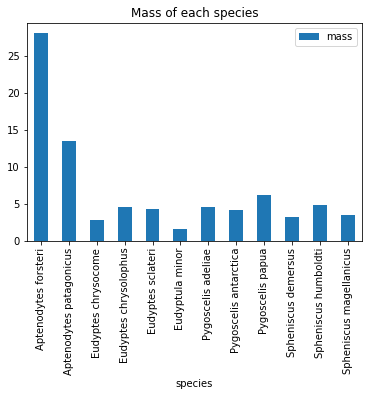

In [77]:
penguins_df.plot(kind='bar',x='species',y='mass', title='Mass of each species') #plotting a bar graoh using penguins dataframe

Q1: What is the smallest penguin species? 
Ans: Eudyptula minor is the smallest penguin by mass
Q2: What is the geographical range of this species?
Ans: Geographical range: Coastlines of southern Australia and New Zealand      Source:https://www.wildlife.vic.gov.au/__data/assets/pdf_file/0023/91391/Little-Penguin.pdf

# 9 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


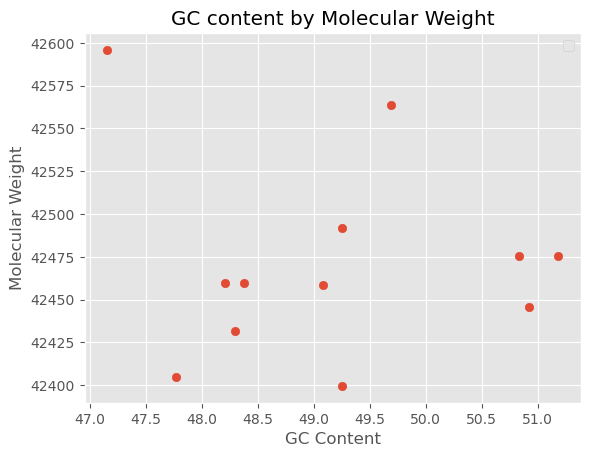

In [20]:
fig, ax =plt.subplots()         #plotting a scatter plot
my_scatter_plot =ax.scatter(
penguins_df["GC content"],         #GC content from penguins dataframe
penguins_df["Molecular Weight"]    #Molecular Weight from penguins dataframe
)

plt.title('GC content by Molecular Weight')
plt.xlabel('GC Content')
plt.ylabel('Molecular Weight')
plt.legend () #Added a title, labeled x and y axes

# 10

In [29]:
penguins_df.to_csv('penguins_mass_cytb.csv', index=False) #saving the new dataframe